# Python（on Google Colab）で遺伝子発現解析（納豆菌編）
遺伝子発現解析をGoogle Colagoratory（通称；Google Colab）上のPythonで試しにやってみた。
全部の遺伝子で遺伝子発現を調べられるトランスクリプトーム（transcriptome）のデータについて、培養条件によって発現に差のある遺伝子をピックアップし、それらが生物学的にどういう機能があるかについて解釈を行っている（あくまで実際の統計を体験してみるのが目的なので、一部 簡略化しているところがある）。（参考までに、同じことをExcelでやった版や、今回扱う納豆菌でなくてシロイヌナズナでやったバージョンもあります）


## Google Colabの利用について
このファイルを自分のGoogle Colaboratory（Google Colab）で開くと編集なりができるようになるはずです。作ったファイルは自分のGoogle Driveに保存されます。
右上にGoogleアカウントのアイコンが出ているはずですが、（私も含めて）複数のGoogle アカウントを持っていると、えてして別のアカウントでGoogle Colabが開いてしまうこともあります。その場合は保存されるファイルもそのアカウントのGoogle Driveに保存されるので、あらかじめ右上の自分のアイコンをクリックして適切なアカウントにしてから作業を開始しましょう。ファイルを行方不明にしないように。。。

## 背景
### 今回 利用するデータ
- GSE109523 ：Transcriptome analysis of Bacillus subtilis NBRC 16449 grown on surface of boiled soybeans under the similar condition to production of Japanese traditional soybean-fermented food "natto" https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE109523
- 日本語訳：Bacillus subtilis（枯草菌・こそうきん）NBRC 16449株における日本の伝統的な大豆発酵食品 納豆の生産と同条件下における茹でた大豆の表面での成長時のトランスクリプトーム（全遺伝子発現）解析
- 今回はこれを加工したデータを用いる ( https://raw.githubusercontent.com/chalkless/lecture/master/biostats/exp_natto/Bsubtilis_exp.for_lec.0613.txt )。あらかじめダウンロードしておく。（右クリックして「名前をつけて保存」）

### 生物学的背景
- あとで書く

### [参考][補足] GEOからの遺伝子発現データの取得
- 今回は、すぐにPythonやExcelで開けるように加工済のデータになっているが、元々の配布されているデータは別形式（＋実験データだけでなく実験条件の情報付き）なのでそのままでは使えない。
- 後で書く。Excelの場合にしっかり書いたのでそちらを参考に

## 遺伝子発現データの統計的な解析
### データをアップロードする
- いきなりつまずく人が多発する鬼門ポイントです。。。
- 画面左端のフォルダーマーク（📁 ←こんな感じの）をクリックする
- と、画面左側にファイルのリストが現れる。広くなったファイルのリストエリアにデータのファイルをドラッグするとGoogle Colabから見える形でファイルがアップされる
　  - 「注: アップロードしたファイルはランタイムのリサイクル時に削除されます。」とメッセージが出るが気にしない。これの意味は、ブラウザのウインドウを閉じてしまったりすると覚えていた（リストとして並んでいた）データファイルが消すからごめんね、ということ。
    - データのファイルが消えてしまったら再度アップすればよい。
    



### データを読み込む

In [3]:
import pandas as pd
df = pd.read_csv('Bsubtilis_exp.for_lec.0613.txt', sep='\t', index_col=0)
df.head()

,Protein_ID,Product,liquid_1,liquid_2,bean_1,bean_2,agar_1,agar_2
Feature_ID,,,,,,,,
gene0,P05648,chromosomal replication initiator protein DnaA,834.102799,576.594721,312.945767,295.518477,266.386503,403.542355
gene1,P05649,DNA polymerase III subunit beta,1055.409089,639.465591,323.554225,258.584583,242.993284,489.855972
gene2,P05650,hypothetical protein,183.757418,366.561974,166.054752,120.104462,169.660218,169.440308
gene3,P05651,DNA replication and repair protein RecF,773.920434,789.808230,429.268016,442.858468,462.013280,517.829470
gene4,P37525,DUF370 domain-containing protein,223.471368,198.102324,122.921247,79.499125,128.286371,114.442001


- `import pandas as pd`：統計用のライブラリpandasを呼んで、pdという名前で呼び出せるようにしています。早い話がおまじないです。（＝なんかよくわからんけど書いとけ）
- `df = pd.read_csv(...)`：pdとして呼び出したpandasのread_csvメソッドでファイルを読み込んでデータフレームdfに格納した。（＝呪文をたくさん知っている大魔神pdを呼び出して、read_csvという呪文でファイルを読み込んで、colab上にdfという表を作ってもらった）
- `df.head()`：データフレームdfの最初5行を表示（表dfに最初の5行を表示する呪文headをかけた → ら、5行分が表示された）
- [補足] `pd.read_csv(...)`の...について
  - `sep='\t'`：区切り文字（*sep*arator）はタブ（便宜的に\tで表す）。別の例で、カンマ区切り（csv形式）なら\tを , にする。
  - `index_col=0`：今回の場合は最初の列を各行のラベル（=行の名前）として扱っているので、これを追記している。indexは目次。colは列（column）のこと。えてしてプログラミングでは数字は0から数え始めるので、1でなく0を値として与えている。
  - 今回は1行目が各列のラベルになっているので特に書いていないが、1行目からデータが書かれている場合は（列ラベルがない場合は）、`header=None`を追記する。もしくは、今回の場合、1行目がヘッダであることを`header=1`と明記してもよい。（index_colは0始まりなのにheaderは1始まりなのは納得いかないと思うが、私も説明できないので納得いかない）

- [参考] 自分でもっといろいろ試してやろうと思っている人向けの解説
  - 今回、データを統計ライブラリのpandasを使って読み込んでいます。
  - これはデータを表全体として読み込んでいるからです。
  - 普通、Pythonで何か処理をしようとすると、ファイルを1行ずつ読み込んで処理することが多い気もしますが、その際は以下のように書いたりします。

In [10]:
# このブロックは参考までの紹介なので実行しなくていい
import csv

file = open('Bsubtilis_exp.for_lec.0613.txt')
reader = csv.reader(file)

for row in reader:
  comment = "この行を書き換えて何か処理したいことを書く"

### 改めてデータを眺めてみる

In [37]:
df.head(3)

,Protein_ID,Product,liquid_1,liquid_2,bean_1,bean_2,agar_1,agar_2,log_liquid1
Feature_ID,,,,,,,,,
gene0,P05648,chromosomal replication initiator protein DnaA,834.102799,576.594721,312.945767,295.518477,266.386503,403.542355,9.704081
gene1,P05649,DNA polymerase III subunit beta,1055.409089,639.465591,323.554225,258.584583,242.993284,489.855972,10.043587
gene2,P05650,hypothetical protein,183.757418,366.561974,166.054752,120.104462,169.660218,169.440308,7.521659


In [38]:
df.tail(3)

,Protein_ID,Product,liquid_1,liquid_2,bean_1,bean_2,agar_1,agar_2,log_liquid1
Feature_ID,,,,,,,,,
gene4592,-,.,94.045531,97.753577,40.161404,80.716228,61.823857,28.505271,6.555287
gene4593,-,.,208.329307,144.499829,211.327820,288.740042,162.390371,218.765991,7.702722
gene4594,-,.,157.148040,48.753774,54.260414,58.637534,29.467181,36.387123,7.295980


- 全データ（df）の最初の方と最後の方を3行ずつ表示してみた。
- 行方向に見ると（たとえばgene0）、P05648というIDで、「chromosomal replication initiator protein DnaA」という名前の遺伝子で、液体培地で培養した時の遺伝子の発現量が834.1と576.6、茹で大豆の表面で培養した時の遺伝子の発現量が312.9と295.5、寒天培地で（略）となっている。
- 列方向に見ると、液体培地で培養した時の実験その1（liquid_1）では、遺伝子gene0の発現量が834.1、遺伝子gene1の発現量が1055.4、（中略）、遺伝子gene4594の発現量が157.1となっている。

### データの分布を、代表する値を計算することで調べてみる
- データの列には遺伝子の発現量が数値で入っている
- ちらちら眺めると0に近い値から千まで数値があるような
- そこで各列のデータの様子を、代表的な値を計算することで概観してみましょう
- たとえば平均値は`mean()`というメソッド（命令・関数）で求めることができます

In [12]:
mean_liq1 = df['liquid_1'].mean()
print(mean_liq1)

355.42691136739074


- `mean_liq1 = df['liquid_1'].mean()`：データフレーム（＝表）dfのliquid_1列に対してmeanという関数で処理しています。
- 他の行も同様に計算できます

In [15]:
mean_liq2 = df['liquid_2'].mean()
print(mean_liq1)

mean_bean1 = df['bean_1'].mean()
print(mean_bean1)

# 上の記述をコピペしてbean_2についても平均を求めてみましょう

355.42691136739074
308.3048581878015


- とは言いながら、列名を指定しないと、各データの行でよしなに平均値を一発で計算してくれます。。。（エラーが出ますが、これは遺伝子名などの数値以外の列が入っているのに気にせずに処理しているからです）

In [17]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


liquid_1    355.426911
liquid_2    342.962154
bean_1      308.304858
bean_2      313.710360
agar_1      338.837129
agar_2      326.483328
dtype: float64

同様に、maxやmin、medianメソッドで最大値、最小値、中央値を求められます。

In [19]:
df.max()

Protein_ID                                   Q9R9I1
Product       zinc-finger domain-containing protein
liquid_1                               42367.244782
liquid_2                                35498.88546
bean_1                                 26693.006155
bean_2                                 25145.310682
agar_1                                 63896.109507
agar_2                                 35186.037619
dtype: object

In [20]:
df.min()

Protein_ID                           -
Product       (2Fe-2S)-binding protein
liquid_1                      0.109456
liquid_2                      0.089984
bean_1                        0.079831
bean_2                        0.110238
agar_1                        0.045831
agar_2                        0.057031
dtype: object

In [21]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


liquid_1    46.416311
liquid_2    46.061268
bean_1      56.646555
bean_2      56.325043
agar_1      58.935522
agar_2      55.874308
dtype: float64

- と、くどくどと計算してきましたが、pandasではこういった代表的な値をまとめて計算してくれるdescribeメソッドがあるのでこれで一撃で表示させることができます。

In [11]:
print(df.describe())

           liquid_1      liquid_2        bean_1        bean_2        agar_1  \
count   4271.000000   4271.000000   4271.000000   4271.000000   4271.000000   
mean     355.426911    342.962154    308.304858    313.710360    338.837129   
std     1697.713792   1592.614755   1194.984222   1272.863163   1691.736040   
min        0.109456      0.089984      0.079831      0.110238      0.045831   
25%       10.549396     10.529950     12.284703     12.123286     13.207663   
50%       46.416311     46.061268     56.646555     56.325043     58.935522   
75%      175.323051    179.308001    173.975579    172.152462    183.723250   
max    42367.244782  35498.885460  26693.006155  25145.310682  63896.109507   

             agar_2  
count   4271.000000  
mean     326.483328  
std     1353.140943  
min        0.057031  
25%       12.377552  
50%       55.874308  
75%      188.914114  
max    35186.037619  


これを眺めるに（今回、対象にするのはliquidとbeanですが）、どの列もだいたい代表する統計値が同じくらいの値をとっているので、特に処理（＝正規化）せずとも先に進んでよさそう、ということがわかる

### データの分布をグラフを描いて直接的に確認してみる
- 上では、データについて代表する値を計算することでデータの概観を試みたが、グラフを描くことでもっと直接的にデータの分布を確認することができる。
- 今回の場合は、データの範囲を区切って、そこに入るデータの個数をカウントしてグラフにするヒストグラム（histgram、度数分布）を描いてみる。

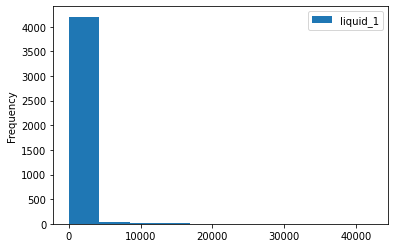

In [32]:
df.plot.hist(y='liquid_1')

- なんかえらい0に偏ったグラフなんですが、、、
- こうやってある桁だけに偏っていたりする場合は、対数をとるとよい場合もあります。
- 後でしっかりやるんですが、ぴろっと対数をとると、以下の感じです

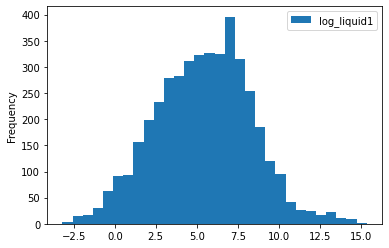

In [33]:
import numpy as np      # ここの行は例によって呪文

# liquid_1列について対数をとってもとのdfに1列追加している
df['log_liquid1'] = np.log2(df['liquid_1'])

# ヒストグラムを描く
df.plot.hist(y='log_liquid1', bins=30)     # binsはグラフの本数のイメージ

遺伝子発現のデータは対数をとると、左右対称のグラフになることが知られています（正規分布という名前でモデル化できます（＝近似的な関数で記述できる））

- liquid_1とliquid_2は、同じ実験を2回やって実験誤差を小さくしようしたデータ。なので、liquid_1の値とliquid_2の値は同じなのが理想。
- liquid_1とbean_1は実験の条件（この場合は培養条件）が違う。なので、**培養の条件（液体か固体か? 養分の差?）と関連のある遺伝子がその条件だけで増えていることが想像できる。**（なのでliquid_1とbean_1で値が違うものがいるはずだし、それがおもしろい）
- というあたりを、散布図（scatter plot）というグラフを描いて確認してみる。

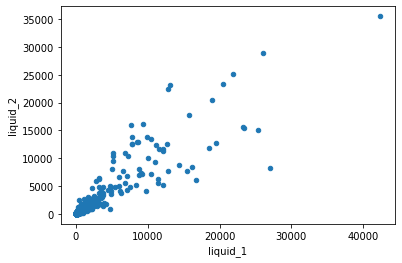

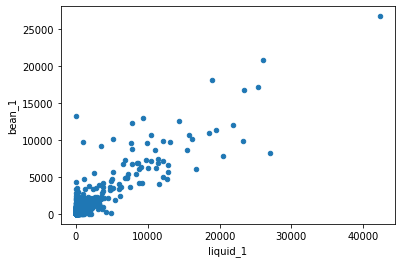

In [41]:
df.plot.scatter(x='liquid_1', y='liquid_2')
df.plot.scatter(x='liquid_1', y='bean_1')

- なんか、0周辺とか特に、liquidどうしだとデータがy=xのグラフに載っていそうだけれども、なんかビミョー。
- これも対数をとるか...

In [42]:
# これは1回呼び出せばよいので今回は不要
# import numpy as np
# というかいまさらだけれども、# を書くとそれ以降はコメントとして扱われるので処理されない（=人間が読む用として何もしない）

df['log_liquid2'] = np.log2(df['liquid_2'])
df['log_bean1'] = np.log2(df['bean_1'])    

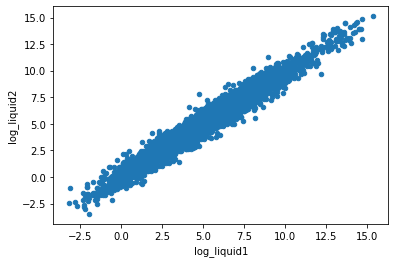

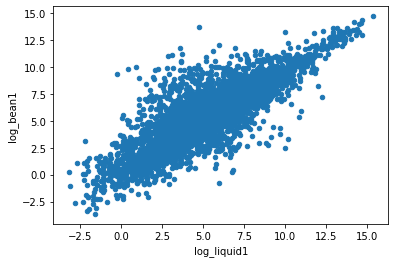

In [44]:
df.plot.scatter(x='log_liquid1', y='log_liquid2')
df.plot.scatter(x='log_liquid1', y='log_bean1')

- やはり実験条件が違うと遺伝子の発現が違う感じがする。
- liquid_1 vs bean_1で（実際は対数をとっているけれども）
  - グラフの右下寄りに出ている点（データ）：liquidの発現量は大きいが、beanの発現量は小さい＝液体中で生きるのに必要な遺伝子 or 茹で大豆の表面で生きるのにいらない遺伝子
  - グラフの左上寄りに出ている点：liquidの発現量は小さいが、beanの発現量は大きい＝液体中で生きるのにいらない遺伝子 or 茹で大豆の表面で生きるのに必要な遺伝子
  - y=xの（心の目で見える）グラフ近辺にある点：液体も茹で大豆の表面も、培養条件と発現量（遺伝子の必要度）に関係のない遺伝子

- では、実際に液体や茹で大豆の表面での生育と関係の深そうな遺伝子を調べてみて、どういう機能を持っているか、確認してみましょう。
- 今回は茹で大豆の表面で遺伝子発現が大きいデータ（グラフで言うと左上の方）の遺伝子について注目してみます。